In [214]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [7]:
Base_polpop_iell_csrf=pd.read_csv('C:\MS\EDA\Base_polpop_iell_csrf_17oct.csv')

In [4]:
Base_polpop_iell_csrf.isnull().sum()

Unnamed: 0                           0
City_poll                            0
Type_of_Location                     0
year_number                          0
month_number                         0
NO2_Median                          38
RSPM_PM10_Median                  1738
SO2_Median                          38
SPM_Median                        2725
Median_SO2_MOM_diff                211
Median_NO2_MOM_diff                212
Median_RSPM_PM10_MOM_diff         1821
Median_SPM_MOM_diff               2853
NO2_P10                             38
RSPM_PM10_P10                     1738
SO2_P10                             38
SPM_P10                           2725
P10_NO2_MOM_diff                   212
P10_SO2_MOM_diff                   211
P10_RSPM_PM10_MOM_diff            1821
P10_SPM_MOM_diff                  2853
NO2_P90                             38
RSPM_PM10_P90                     1738
SO2_P90                             38
SPM_P90                           2725
month_number_diff        

In [8]:
YearClusterData=Base_polpop_iell_csrf[['year_number','NO2_Median','Median_NO2_MOM_diff','NO2_P10','P10_NO2_MOM_diff','NO2_P90','P90_NO2_MOM_diff','NO2_Median_YOY_diff','NO2_P10_YOY_diff','NO2_P90_YOY_diff','SO2_Median','Median_SO2_MOM_diff','SO2_P10','P10_SO2_MOM_diff','SO2_P90','P90_SO2_MOM_diff','SO2_Median_YOY_diff','SO2_P10_YOY_diff','SO2_P90_YOY_diff','RSPM_PM10_Median','Median_RSPM_PM10_MOM_diff','RSPM_PM10_P10','P10_RSPM_PM10_MOM_diff','RSPM_PM10_P90','P90_RSPM_PM10_MOM_diff','RSPM_PM10_Median_YOY_diff','RSPM_PM10_P10_YOY_diff','RSPM_PM10_P90_YOY_diff']]

In [18]:
YearClusterDataLtd=Base_polpop_iell_csrf[['year_number','NO2_Median','NO2_P10','NO2_P90','SO2_Median','SO2_P10','SO2_P90','RSPM_PM10_Median','RSPM_PM10_P10','RSPM_PM10_P90']]

In [116]:
YearClusterDataNSo2=Base_polpop_iell_csrf[['rec_id','year_number','NO2_Median','NO2_P10','NO2_P90','SO2_Median','SO2_P10','SO2_P90']]

In [117]:
min(YearClusterDataNSo2.year_number)

1987

In [118]:
YearClusterDataNSo2.year_number=YearClusterDataNSo2.year_number-1986

In [119]:
YearClusterDataLtd.shape

(5715, 10)

In [120]:
YearClusterDataNSo2.isnull().any(axis=0) 

rec_id         False
year_number    False
NO2_Median      True
NO2_P10         True
NO2_P90         True
SO2_Median      True
SO2_P10         True
SO2_P90         True
dtype: bool

In [101]:
YearClusterDataNSo2.isnull().sum()

rec_id          0
year_number     0
NO2_Median     38
NO2_P10        38
NO2_P90        38
SO2_Median     38
SO2_P10        38
SO2_P90        38
dtype: int64

In [121]:
YearClusterDataNSo2.dropna(inplace=True)

In [122]:
YearClusterDataNSo2_ori=YearClusterDataNSo2

In [123]:
YearClusterDataNSo2=YearClusterDataNSo2[['year_number','NO2_Median','NO2_P10','NO2_P90','SO2_Median','SO2_P10','SO2_P90']]

In [124]:
YearClusterDataNSo2.isnull().sum()

year_number    0
NO2_Median     0
NO2_P10        0
NO2_P90        0
SO2_Median     0
SO2_P10        0
SO2_P90        0
dtype: int64

In [128]:
YearClusterDataLtd.loc[YearClusterDataLtd.RSPM_PM10_Median.isnull(),['year_number']].min()

AttributeError: 'DataFrame' object has no attribute 'RSPM_PM10_Median'

In [126]:
YearClusterDataLtd.loc[YearClusterDataLtd.RSPM_PM10_Median.isnull(),['year_number']].max()

year_number    20
dtype: int64

In [127]:
YearClusterDataLtd.loc[YearClusterDataLtd.RSPM_PM10_Median.isnull(),'year_number'].value_counts()

13    195
14    189
12    173
16    172
15    162
11    161
10    132
8      96
9      76
7      72
4      66
5      64
18     48
20     29
6      26
17     24
19     22
3      18
2       7
1       6
Name: year_number, dtype: int64

In [130]:
YearClusterDataLtd['year_number'].value_counts()

25    489
27    443
26    440
28    432
29    423
24    384
22    300
21    300
23    276
20    267
13    195
14    189
19    178
12    173
16    172
15    162
11    161
18    144
10    132
8      96
9      76
7      72
4      66
5      64
6      26
17     24
3      18
2       7
1       6
Name: year_number, dtype: int64

year_number                  11.000000
NO2_Median                   22.500000
Median_NO2_MOM_diff           5.354167
NO2_P10                      20.800000
P10_NO2_MOM_diff              4.745000
NO2_P90                      25.600000
P90_NO2_MOM_diff              6.505000
NO2_Median_YOY_diff           9.100000
NO2_P10_YOY_diff              8.315000
NO2_P90_YOY_diff             11.600000
SO2_Median                   14.500000
Median_SO2_MOM_diff           2.900000
SO2_P10                      12.500000
P10_SO2_MOM_diff              2.240000
SO2_P90                      17.750000
P90_SO2_MOM_diff              3.800000
SO2_Median_YOY_diff           5.050000
SO2_P10_YOY_diff              4.167500
SO2_P90_YOY_diff              6.822500
RSPM_PM10_Median             53.000000
Median_RSPM_PM10_MOM_diff    25.500000
RSPM_PM10_P10                37.100000
P10_RSPM_PM10_MOM_diff       18.900000
RSPM_PM10_P90                68.400000
P90_RSPM_PM10_MOM_diff       32.475000
RSPM_PM10_Median_YOY_diff

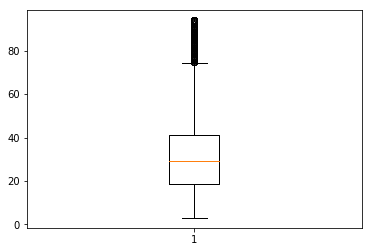

In [131]:
# outlier treatment for Amount
plt.boxplot(YearClusterDataNSo2.NO2_Median)
Q1 = YearClusterData.quantile(0.25)
Q3 = YearClusterData.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
#RFM = RFM[(RFM.Amount >= Q1 - 1.5*IQR) & (RFM.Amount <= Q3 + 1.5*IQR)]

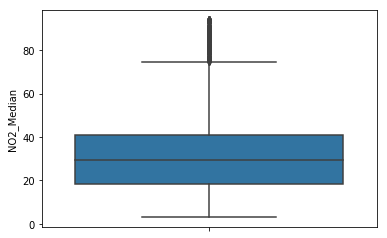

In [132]:
sns.boxplot(y="NO2_Median", data=YearClusterDataNSo2)

In [133]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
YearClusterDataNSo2_norm = standard_scaler.fit_transform(YearClusterDataNSo2)

In [134]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [135]:
hopkins(YearClusterDataNSo2_norm)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

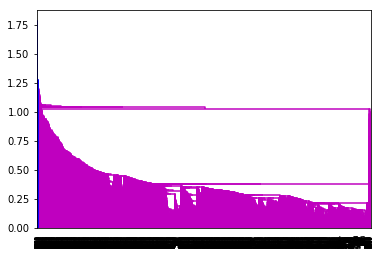

In [136]:
# heirarchical clustering
mergings = linkage(YearClusterDataNSo2_norm, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

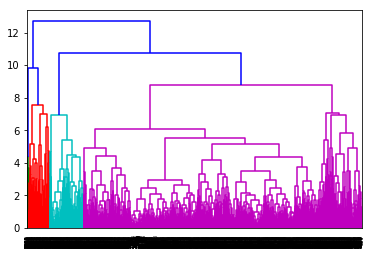

In [137]:
# heirarchical clustering
mergings = linkage(YearClusterDataNSo2_norm, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [139]:
YearClusterDataNSo2_ori.head()

,rec_id,year_number,NO2_Median,NO2_P10,NO2_P90,SO2_Median,SO2_P10,SO2_P90
0,0,25,12.0,10.4,14.4,11.0,7.8,12.6
1,1,25,11.0,10.2,11.8,9.0,8.2,9.8
2,2,25,10.0,10.0,10.0,9.0,9.0,9.0
3,3,25,14.0,12.6,15.0,12.0,11.6,13.0
4,4,25,14.0,11.0,14.6,12.0,9.6,13.0


In [225]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 4).reshape(-1,))
YearClusterDataNSo2_OriClus = pd.concat([YearClusterDataNSo2_ori, clusterCut], axis=1)

In [226]:
YearClusterDataNSo2_OriClus.columns

Index([     'rec_id', 'year_number',  'NO2_Median',     'NO2_P10',
           'NO2_P90',  'SO2_Median',     'SO2_P10',     'SO2_P90',
                   0],
      dtype='object')

In [227]:
YearClusterDataNSo2_OriClus.columns=[ 'rec_id', 'year_number',  'NO2_Median',     'NO2_P10',
           'NO2_P90',  'SO2_Median',     'SO2_P10',     'SO2_P90',    'ClusterId']

In [228]:
YearClusterDataNSo2_OriClus.head()

,rec_id,year_number,NO2_Median,NO2_P10,NO2_P90,SO2_Median,SO2_P10,SO2_P90,ClusterId
0,0.0,25.0,12.0,10.4,14.4,11.0,7.8,12.6,0.0
1,1.0,25.0,11.0,10.2,11.8,9.0,8.2,9.8,0.0
2,2.0,25.0,10.0,10.0,10.0,9.0,9.0,9.0,0.0
3,3.0,25.0,14.0,12.6,15.0,12.0,11.6,13.0,0.0
4,4.0,25.0,14.0,11.0,14.6,12.0,9.6,13.0,0.0


In [229]:
clusters_NO2_Median = 	pd.DataFrame(YearClusterDataNSo2_OriClus.groupby(["ClusterId"]).NO2_Median.mean())
clusters_NO2_P10 = 	pd.DataFrame(YearClusterDataNSo2_OriClus.groupby(["ClusterId"]).NO2_P10.mean())
clusters_NO2_P90 = 	pd.DataFrame(YearClusterDataNSo2_OriClus.groupby(["ClusterId"]).NO2_P90.mean())
clusters_SO2_Median = 	pd.DataFrame(YearClusterDataNSo2_OriClus.groupby(["ClusterId"]).SO2_Median.mean())
clusters_SO2_P10 = 	pd.DataFrame(YearClusterDataNSo2_OriClus.groupby(["ClusterId"]).SO2_P10.mean())
clusters_SO2_P90 = 	pd.DataFrame(YearClusterDataNSo2_OriClus.groupby(["ClusterId"]).SO2_P90.mean())
clusters_year_number = 	pd.DataFrame(YearClusterDataNSo2_OriClus.groupby(["ClusterId"]).year_number.mean())



In [230]:
df = pd.concat([pd.Series([0,1,2,3]), clusters_NO2_Median, clusters_NO2_P10, clusters_NO2_P90,clusters_SO2_Median,clusters_SO2_P10,clusters_SO2_P90,clusters_year_number], axis=1)
df.columns = ["ClusterID", "clusters_NO2_Median", "clusters_NO2_P10", "clusters_NO2_P90","clusters_SO2_Median","clusters_SO2_P10","clusters_SO2_P90","clusters_year_number"]
df.head()

,ClusterID,clusters_NO2_Median,clusters_NO2_P10,clusters_NO2_P90,clusters_SO2_Median,clusters_SO2_P10,clusters_SO2_P90,clusters_year_number
0,0,28.917638,23.450373,35.899026,17.447149,14.460739,21.369117,20.791204
1,1,40.728069,33.594826,49.909585,17.501444,14.446606,22.450903,21.068592
2,2,47.138277,39.610508,55.464181,29.582203,24.824379,35.768192,19.793785
3,3,38.364103,35.645641,41.345641,30.466667,29.117949,32.411282,14.948718


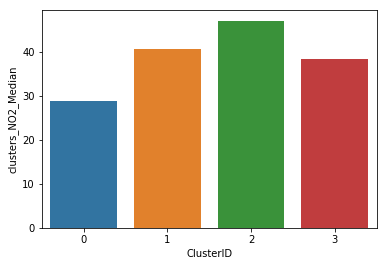

In [231]:
#plotting barplot
sns.barplot(x=df.ClusterID, y=df.clusters_NO2_Median)

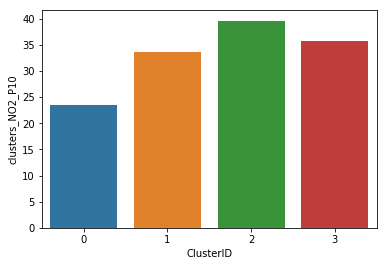

In [232]:
#plotting barplot
sns.barplot(x=df.ClusterID, y=df.clusters_NO2_P10)

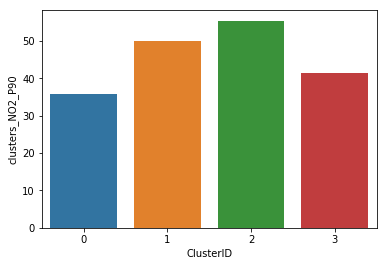

In [233]:
#plotting barplot
sns.barplot(x=df.ClusterID, y=df.clusters_NO2_P90)

In [234]:
df.columns

Index(['ClusterID', 'clusters_NO2_Median', 'clusters_NO2_P10',
       'clusters_NO2_P90', 'clusters_SO2_Median', 'clusters_SO2_P10',
       'clusters_SO2_P90', 'clusters_year_number'],
      dtype='object')

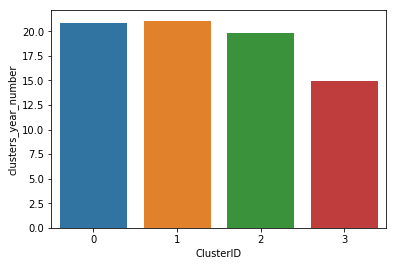

In [235]:
#plotting barplot
sns.barplot(x=df.ClusterID, y=df.clusters_year_number)

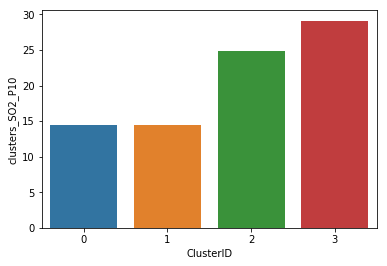

In [236]:
#plotting barplot
sns.barplot(x=df.ClusterID, y=df.clusters_SO2_P10)

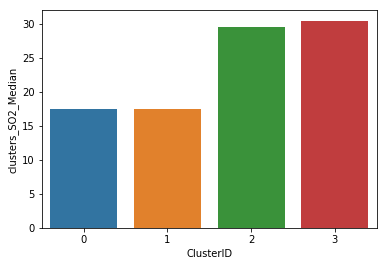

In [237]:
#plotting barplot
sns.barplot(x=df.ClusterID, y=df.clusters_SO2_Median)

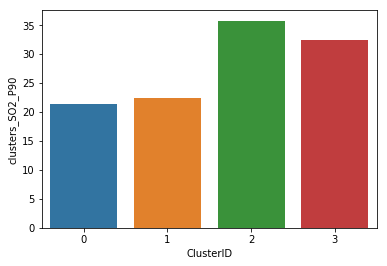

In [238]:
#plotting barplot
sns.barplot(x=df.ClusterID, y=df.clusters_SO2_P90)

In [159]:
df[df.ClusterID==0]

,ClusterID,clusters_NO2_Median,clusters_NO2_P10,clusters_NO2_P90,clusters_SO2_Median,clusters_SO2_P10,clusters_SO2_P90,clusters_year_number
0,0,27.187339,21.728194,34.271439,15.268426,12.511784,19.039605,21.264467


In [239]:
pd.concat([ClusterOne,pd.Series(df.columns)], axis=1)

,variables,values,0
0,ClusterID,4.000000,ClusterID
1,clusters_NO2_Median,38.364103,clusters_NO2_Median
2,clusters_NO2_P10,35.645641,clusters_NO2_P10
3,clusters_NO2_P90,41.345641,clusters_NO2_P90
4,clusters_SO2_Median,30.466667,clusters_SO2_Median
5,clusters_SO2_P10,29.117949,clusters_SO2_P10
6,clusters_SO2_P90,32.411282,clusters_SO2_P90
7,clusters_year_number,14.948718,clusters_year_number


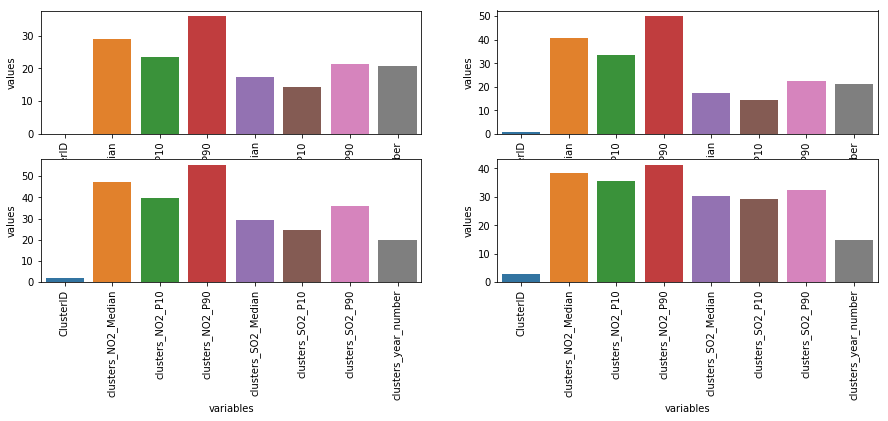

In [240]:
plt.figure(figsize = (15,5))
for i in range(0, 4):    
    ClusterOne=np.transpose(df[df.ClusterID==i])
    ClusterOne.reset_index(inplace=True)
    ClusterOne.columns=['variables', 'values']
    ClusterOne['values']=ClusterOne['values'].map(float)
    plt.subplot(2, 2, i+1)
    t=sns.barplot(x='variables',y='values',data=ClusterOne)
    t.set_xticklabels(labels=ClusterOne.variables,rotation=90)

In [221]:
# Kmeans with K=5
model_clus5 = KMeans(n_clusters = 4, max_iter=50)
model_clus5.fit(YearClusterDataNSo2_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [222]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(YearClusterDataNSo2_norm)
    sse_.append([k, silhouette_score(YearClusterDataNSo2_norm, kmeans.labels_)])

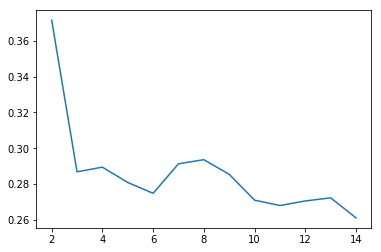

In [223]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

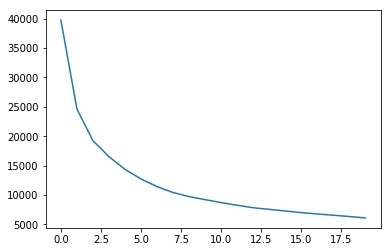

In [224]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(YearClusterDataNSo2_norm)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)